## Predicción 

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [202]:
# cargar datos
consumo = pd.read_csv('data/consumo_clean_df.csv', parse_dates=['Fecha'], index_col='Fecha')
importacion = pd.read_csv('data/importacion_clean_df.csv', parse_dates=['Fecha'], index_col='Fecha')

In [203]:
print("Consumo: Inicio:", consumo.index.min(), "Fin:", consumo.index.max(), "Frecuencia:", pd.infer_freq(consumo.index))
print("Importación: Inicio:", importacion.index.min(), "Fin:", importacion.index.max(), "Frecuencia:", pd.infer_freq(importacion.index))

Consumo: Inicio: 2000-01-01 00:00:00 Fin: 2024-12-01 00:00:00 Frecuencia: MS
Importación: Inicio: 2001-01-01 00:00:00 Fin: 2024-12-01 00:00:00 Frecuencia: MS


c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).

Evaluación de la predicción (2023-2024):
MAE: 230.28


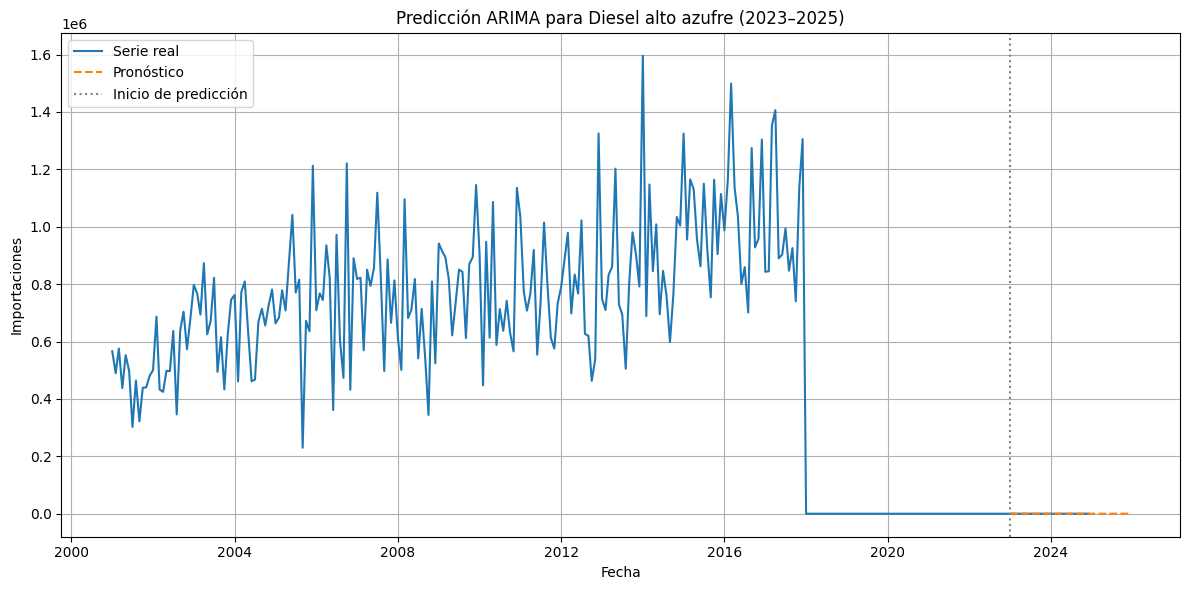

In [204]:
serie = importacion['Diesel alto azufre'].dropna()

train = serie[:'2022']
test = serie['2023': '2024']
modelo = ARIMA(train, order=(2, 1, 5))
resultado = modelo.fit()

forecast = resultado.predict(start=test.index[0], end='2025-12', typ='levels')

if not test.empty:
    # Cortamos forecast para coincidir con test
    forecast_eval = forecast.loc[test.index.intersection(forecast.index)]

    # Métricas de evaluación
    mae = mean_absolute_error(test.loc[forecast_eval.index], forecast_eval)

    print(f"Evaluación de la predicción (2023-2024):")
    print(f"MAE: {mae:.2f}")
else:
    print("No hay datos reales para 2023-2024 para evaluar.")

plt.figure(figsize=(12, 6))
plt.plot(serie, label='Serie real')
plt.plot(forecast, label='Pronóstico', linestyle='--')
plt.axvline(pd.to_datetime('2023-01-01'), color='grey', linestyle=':', label='Inicio de predicción')
plt.title("Predicción ARIMA para Diesel alto azufre (2023–2025)")
plt.xlabel("Fecha")
plt.ylabel("Importaciones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found

Evaluación de la predicción (2023-2024):
MAE: 79458.44


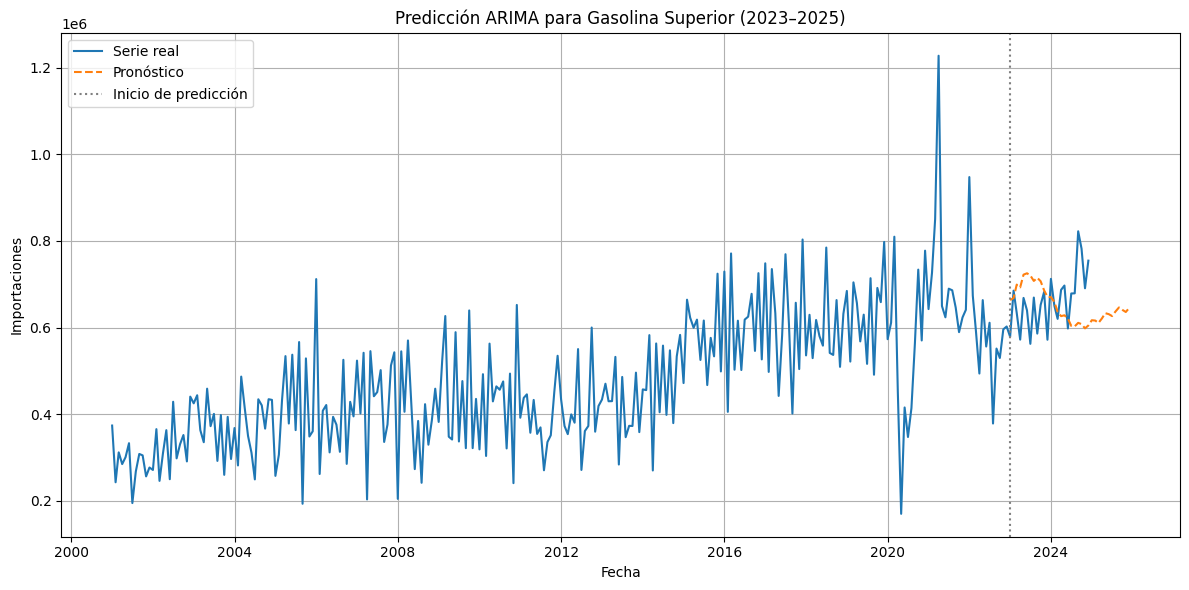

In [205]:
serie = importacion['Gasolina superior'].dropna()

train = serie[:'2022']
test = serie['2023': '2024']
modelo = ARIMA(train, order=(11, 1, 6))
resultado = modelo.fit()

forecast = resultado.predict(start=test.index[0], end='2025-12', typ='levels')

if not test.empty:
    # Cortamos forecast para coincidir con test
    forecast_eval = forecast.loc[test.index.intersection(forecast.index)]

    # Métricas de evaluación
    mae = mean_absolute_error(test.loc[forecast_eval.index], forecast_eval)

    print(f"Evaluación de la predicción (2023-2024):")
    print(f"MAE: {mae:.2f}")
else:
    print("No hay datos reales para 2023-2024 para evaluar.")

plt.figure(figsize=(12, 6))
plt.plot(serie, label='Serie real')
plt.plot(forecast, label='Pronóstico', linestyle='--')
plt.axvline(pd.to_datetime('2023-01-01'), color='grey', linestyle=':', label='Inicio de predicción')
plt.title("Predicción ARIMA para Gasolina Superior (2023–2025)")
plt.xlabel("Fecha")
plt.ylabel("Importaciones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found

Evaluación de la predicción (2023-2024):
MAE: 67366.25


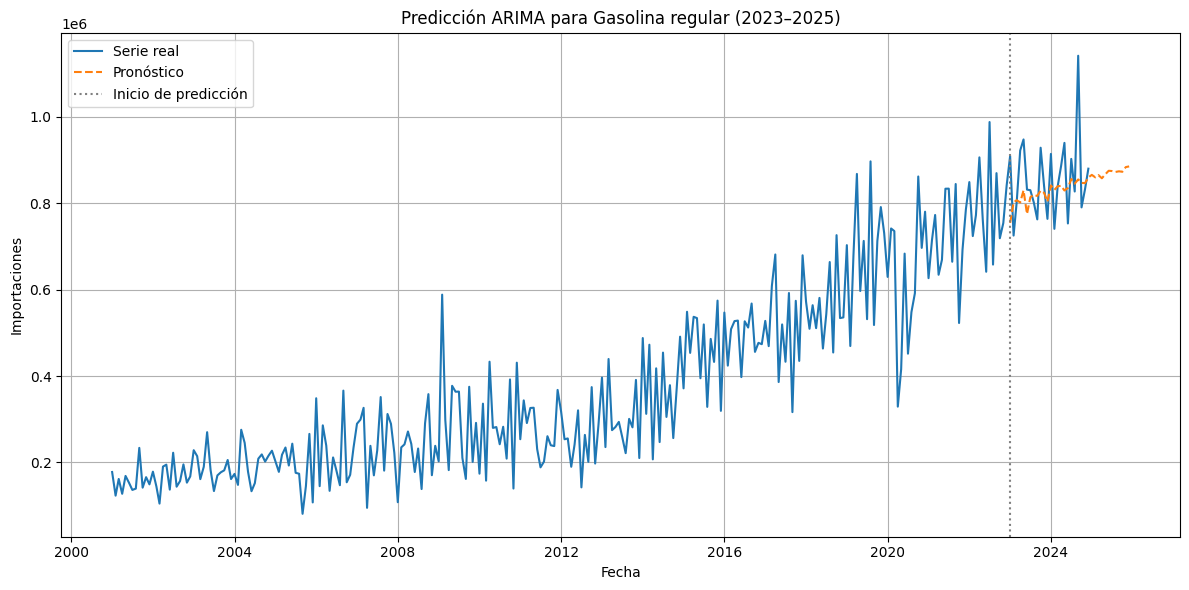

In [206]:
serie = importacion['Gasolina regular'].dropna()

train = serie[:'2022']
test = serie['2023': '2024']
modelo = ARIMA(train, order=(6, 1, 12))
resultado = modelo.fit()

forecast = resultado.predict(start=test.index[0], end='2025-12', typ='levels')

if not test.empty:
    # Cortamos forecast para coincidir con test
    forecast_eval = forecast.loc[test.index.intersection(forecast.index)]

    # Métricas de evaluación
    mae = mean_absolute_error(test.loc[forecast_eval.index], forecast_eval)

    print(f"Evaluación de la predicción (2023-2024):")
    print(f"MAE: {mae:.2f}")
else:
    print("No hay datos reales para 2023-2024 para evaluar.")

plt.figure(figsize=(12, 6))
plt.plot(serie, label='Serie real')
plt.plot(forecast, label='Pronóstico', linestyle='--')
plt.axvline(pd.to_datetime('2023-01-01'), color='grey', linestyle=':', label='Inicio de predicción')
plt.title("Predicción ARIMA para Gasolina regular (2023–2025)")
plt.xlabel("Fecha")
plt.ylabel("Importaciones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En el análisis de los modelos ARIMA aplicados a las series de importación de Diesel alto azufre, gasolina regular y gasolina superior, se observa que el modelo logra capturar adecuadamente la tendencia general en los tres casos, aunque con distintos niveles de precisión.  

En el caso de la gasolina Diesel y la gasolina regular el modelo fue capaz de predecir de manera correcta la tendencia del comportamiento. Se puede observar que en el caso de Diesel acierta de manera casi perfecta, pero se da a entender porque es más facil predecirlo por la caida abrupta y la constancia en 0 que tiene de los ultimos años anteriores, en el caso de regular predice bien la tendencia pero los picos no los acierta, esto puede ser ya que no se marca una estacionalidad no es facil predecir estos picos. En el caso de la superior se mantiene en un rango similar al real, pero este no es capaz de ajustarse tan bien como los otros dos.   

el modelo ARIMA demuestra un buen desempeño general, especialmente en series con patrones marcados como el del Diesel. No obstante, su precisión disminuye en aquellas series donde las fluctuaciones son menos predecibles o carecen de patrones consistentes, como ocurre con las gasolinas regular y superior.

## Predicción 2025 

In [207]:
FileOG = "./data/IMPORTACION-HIDROCARBUROS-VOLUMEN-2025-05.xlsx"
importacion2025 = pd.read_excel(FileOG, sheet_name="IMPORTACION", engine="openpyxl")
importacion2025.to_csv("./data/importacion2025.csv", index=False)


In [208]:
df = pd.read_csv('./data/importacion2025.csv', skiprows=6)
df = df.dropna(how='all')  # borra filas donde todo es NaN

col = ["Fecha", "Gasolina regular", "Gasolina superior"]
df = df[:-2]
df_filtrado = df[col]

df_filtrado.to_csv("./data/importacion2025.csv", index=False)

In [209]:
df_filtrado = df_filtrado.set_index('Fecha')
df_filtrado


,Gasolina regular,Gasolina superior
Fecha,,
2025-01-01 00:00:00,788005.35,645188.60
2025-02-01 00:00:00,857375.76,686641.50
2025-03-01 00:00:00,800182.17,796513.62
2025-04-01 00:00:00,898147.98,643476.90
2025-05-01 00:00:00,785675.37,747443.53


c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

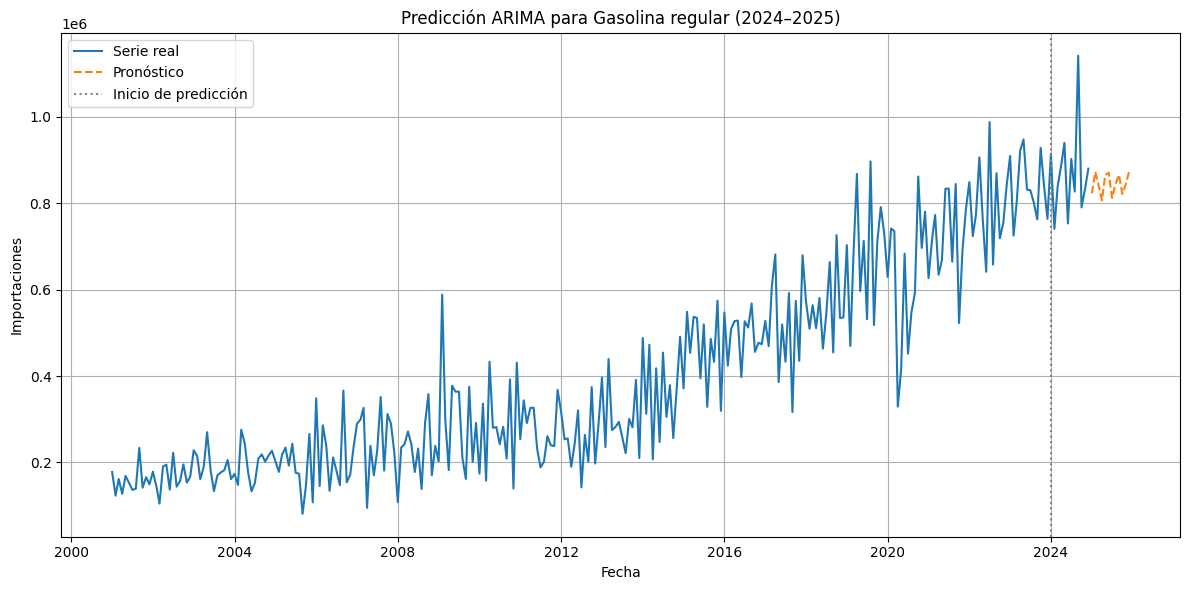

In [214]:
    serie = importacion['Gasolina regular'].dropna()
    serie2 = df_filtrado['Gasolina regular'].dropna()


    train = serie[:'2023']
    test = serie2
    modelo = ARIMA(train, order=(6, 1, 12))
    resultado = modelo.fit()

    forecast = resultado.predict(start=test.index[0], end='2025-12', typ='levels')

    plt.figure(figsize=(12, 6))
    plt.plot(serie, label='Serie real')
    plt.plot(forecast, label='Pronóstico', linestyle='--')
    plt.axvline(pd.to_datetime('2024-01-01'), color='grey', linestyle=':', label='Inicio de predicción')
    plt.title("Predicción ARIMA para Gasolina regular (2024–2025)")
    plt.xlabel("Fecha")
    plt.ylabel("Importaciones")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Francis\OneDrive - UVG\Francis\2025\Semestre 8\Data Science\lab1-ds\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

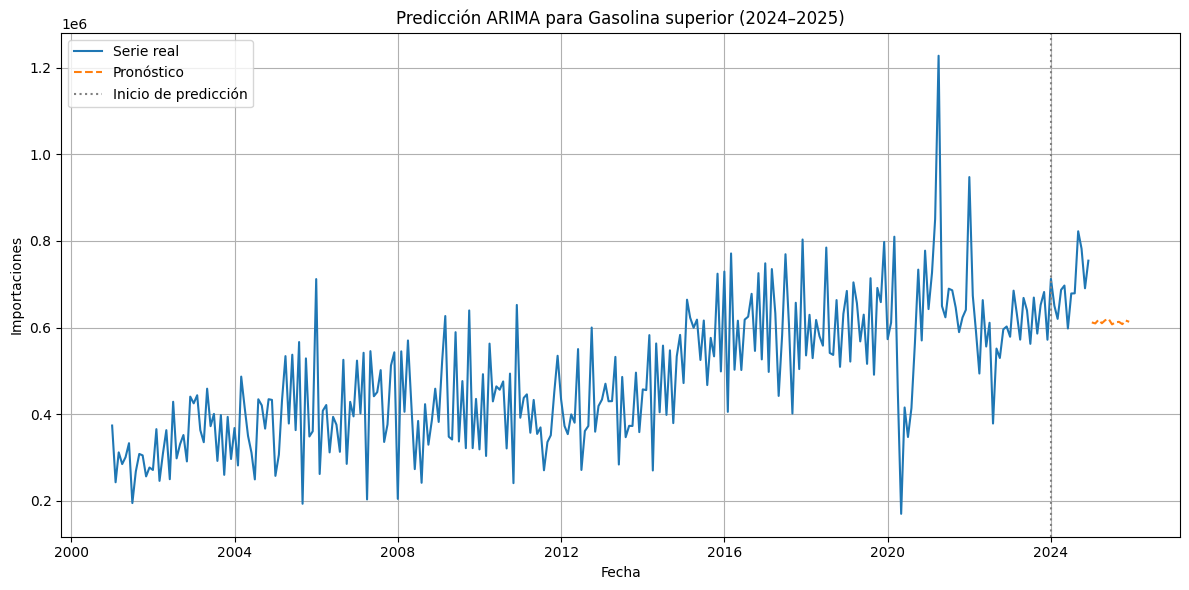

In [211]:
    serie = importacion['Gasolina superior'].dropna()
    serie2 = df_filtrado['Gasolina superior'].dropna()


    train = serie[:'2023']
    test = serie2
    modelo = ARIMA(train, order=(6, 1, 12))
    resultado = modelo.fit()

    forecast = resultado.predict(start=test.index[0], end='2025-12', typ='levels')

    plt.figure(figsize=(12, 6))
    plt.plot(serie, label='Serie real')
    plt.plot(forecast, label='Pronóstico', linestyle='--')
    plt.axvline(pd.to_datetime('2024-01-01'), color='grey', linestyle=':', label='Inicio de predicción')
    plt.title("Predicción ARIMA para Gasolina superior (2024–2025)")
    plt.xlabel("Fecha")
    plt.ylabel("Importaciones")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Ambos se apegan bastante bien a la realidad, aunque el de gasolina superior no tienen la continuidad que se desea a comparacion con la regular